## HealthCare Analytics: Predicting the Length of Stay (LOS) of a patient
**Objective: Predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning.**

**The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.**

## Load Libraries and Data

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [297]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
dictionary = pd.read_csv('train_data_dictionary.csv')
sample = pd.read_csv('sample_sub.csv')

## Data Dictionary

In [177]:
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


## 1. Exploratory Data Analysis

Questions to be answered:
1. What are important variables that vary between length of stay? (Available Extra Rooms, Department, Type of Admission, Severity of Illness, Admission Deposit)
2. Main demographics of the patients
3. Heatmap of variables

In [178]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

In [179]:
train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [180]:
train.tail(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [181]:
train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [182]:
train["Stay"].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

[Text(0, 0, '21-30'),
 Text(0, 0, '11-20'),
 Text(0, 0, '31-40'),
 Text(0, 0, '51-60'),
 Text(0, 0, '0-10'),
 Text(0, 0, '41-50'),
 Text(0, 0, '71-80'),
 Text(0, 0, 'More than 100 Days'),
 Text(0, 0, '81-90'),
 Text(0, 0, '91-100'),
 Text(0, 0, '61-70')]

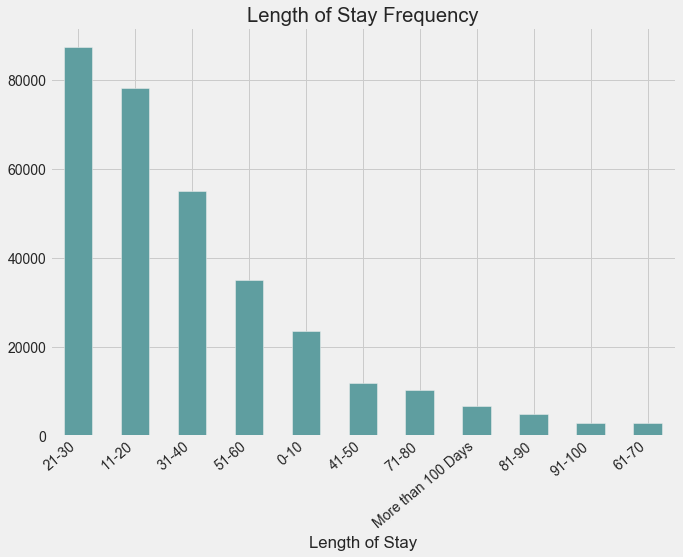

In [258]:
# Distribution of target feature
plt.figure(figsize=(10,7))
stay_dist= train["Stay"].value_counts().plot(kind="bar", color = ['cadetblue'])
stay_dist.set_title("Length of Stay Frequency")
stay_dist.set_xlabel("Length of Stay")
stay_dist.set_xticklabels(stay_dist.get_xticklabels(), rotation=40, ha="right")

In [247]:
train.groupby("Stay")["Admission_Deposit"].agg(["mean","count"])

,mean,count
Stay,,
0-10,4615.214625,23604
11-20,4931.124829,78139
21-30,5025.310329,87491
31-40,4871.071067,55159
41-50,4888.818530,11743
51-60,4748.784397,35018
61-70,4845.449344,2744
71-80,4709.845426,10254
81-90,4590.644688,4838


[Text(0, 0, '0-10'),
 Text(0, 0, '11-20'),
 Text(0, 0, '21-30'),
 Text(0, 0, '31-40'),
 Text(0, 0, '41-50'),
 Text(0, 0, '51-60'),
 Text(0, 0, '61-70'),
 Text(0, 0, '71-80'),
 Text(0, 0, '81-90'),
 Text(0, 0, '91-100'),
 Text(0, 0, 'More than 100 Days')]

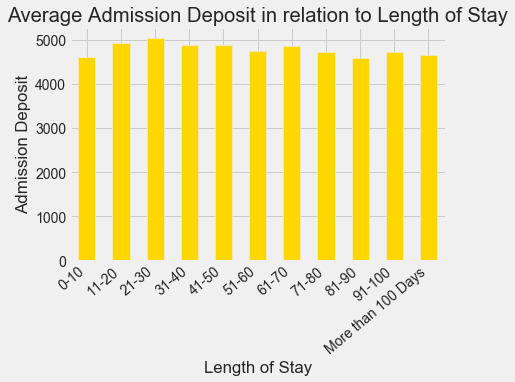

In [257]:
ad_mean = train.groupby("Stay")["Admission_Deposit"].agg(["mean"]).plot(kind = "bar", color = "gold", legend = None)
ad_mean.set_title("Average Admission Deposit in relation to Length of Stay")
ad_mean.set_xlabel("Length of Stay")
ad_mean.set_ylabel("Admission Deposit")
ad_mean.set_xticklabels(ad_mean.get_xticklabels(), rotation=40, ha="right")

Interesting to see that the admission deposit is on average the highest during 21-30 days of stay. Need to find explanation for why

In [187]:
train.groupby("Stay")["Visitors with Patient"].agg(["mean","count"])

,mean,count
Stay,,
0-10,2.565158,23604
11-20,2.738940,78139
21-30,2.679487,87491
31-40,3.453797,55159
41-50,3.032785,11743
51-60,4.390828,35018
61-70,3.566691,2744
71-80,4.892335,10254
81-90,6.100661,4838


[Text(0, 0, '0-10'),
 Text(0, 0, '11-20'),
 Text(0, 0, '21-30'),
 Text(0, 0, '31-40'),
 Text(0, 0, '41-50'),
 Text(0, 0, '51-60'),
 Text(0, 0, '61-70'),
 Text(0, 0, '71-80'),
 Text(0, 0, '81-90'),
 Text(0, 0, '91-100'),
 Text(0, 0, 'More than 100 Days')]

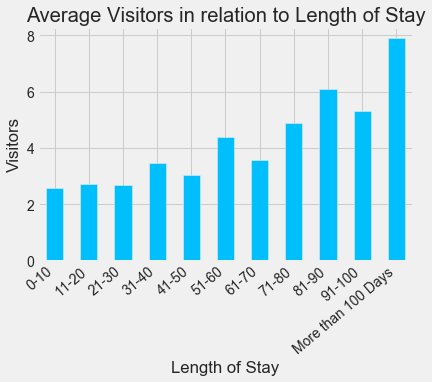

In [259]:
visitor_mean = train.groupby("Stay")["Visitors with Patient"].agg(["mean"]).plot(kind = "bar", color = "deepskyblue", legend = None)
visitor_mean.set_title("Average Visitors in relation to Length of Stay")
visitor_mean.set_xlabel("Length of Stay")
visitor_mean.set_ylabel("Visitors")
visitor_mean.set_xticklabels(visitor_mean.get_xticklabels(), rotation=40, ha="right")

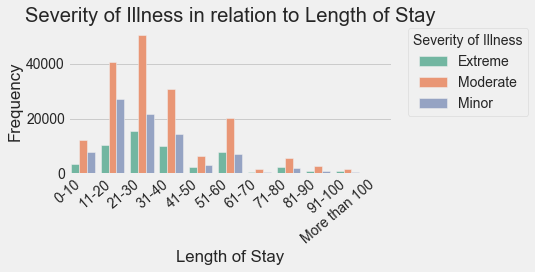

In [380]:
ax1 = sns.countplot(x = train["Stay"], 
                    hue = train['Severity of Illness'], 
                    order = ["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100","More than 100"],
                   palette = "Set2")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_title("Severity of Illness in relation to Length of Stay")
ax1.set_xlabel("Length of Stay")
ax1.set_ylabel("Frequency")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Severity of Illness")
plt.show()

Text(0, 0.5, 'Normalized Frequency')

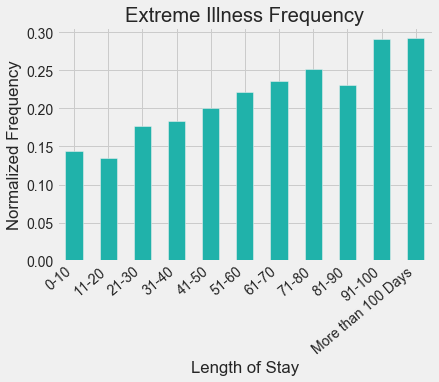

In [391]:
ex_stay = train.groupby("Stay")["Severity of Illness"].value_counts(normalize=True).unstack()["Extreme"].plot(kind = "bar", 
                                                                                                              color = "lightseagreen")
ex_stay.set_xticklabels(ex_stay.get_xticklabels(), rotation=40, ha="right")
ex_stay.set_title("Extreme Illness Frequency")
ex_stay.set_xlabel("Length of Stay")
ex_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

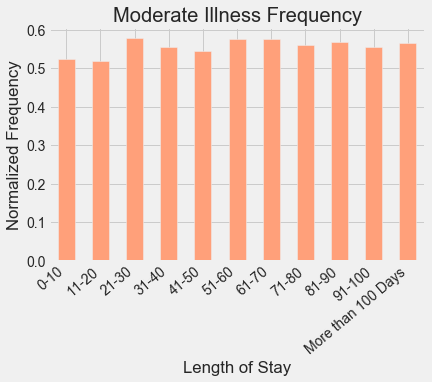

In [392]:
mo_stay = train.groupby("Stay")["Severity of Illness"].value_counts(normalize=True).unstack()["Moderate"].plot(kind = "bar", 
                                                                                                               color = "lightsalmon")
mo_stay.set_xticklabels(mo_stay.get_xticklabels(), rotation=40, ha="right")
mo_stay.set_title("Moderate Illness Frequency")
mo_stay.set_xlabel("Length of Stay")
mo_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

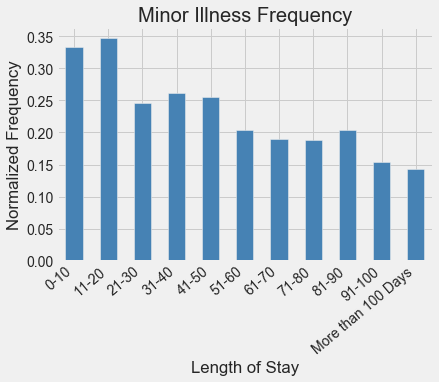

In [393]:
mi_stay = train.groupby("Stay")["Severity of Illness"].value_counts(normalize=True).unstack()["Minor"].plot(kind = "bar", 
                                                                                                            color = "steelblue")
mi_stay.set_xticklabels(mi_stay.get_xticklabels(), rotation=40, ha="right")
mi_stay.set_title("Minor Illness Frequency")
mi_stay.set_xlabel("Length of Stay")
mi_stay.set_ylabel("Normalized Frequency")

Relatively straightforward - extreme severity patients are much lower, and require longer days of stay. Minor severity patients are more common, yet they do not need to stay for a long time.

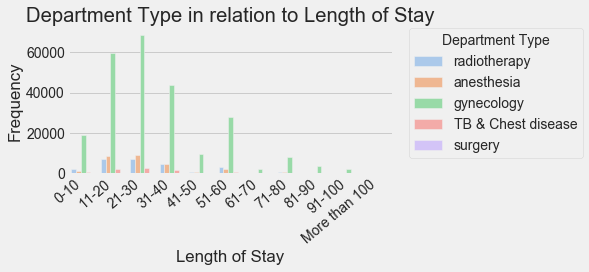

In [376]:
ax2 = sns.countplot(x = train["Stay"], 
                    hue = train["Department"], 
                    order = ["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100","More than 100"],
                   palette = "pastel")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title("Department Type in relation to Length of Stay")
ax2.set_xlabel("Length of Stay")
ax2.set_ylabel("Frequency")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Department Type")
plt.show()

Text(0, 0.5, 'Normalized Frequency')

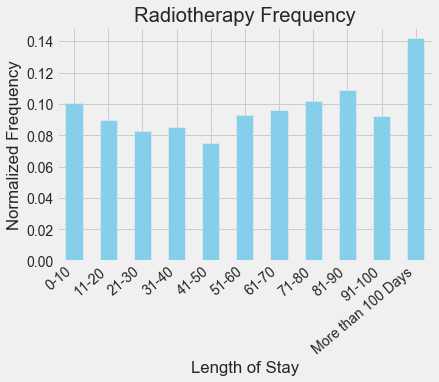

In [384]:
ra_stay = train.groupby("Stay")["Department"].value_counts(normalize=True).unstack()["radiotherapy"].plot(kind = "bar",
                                                                                                          color = "skyblue")
ra_stay.set_xticklabels(ra_stay.get_xticklabels(), rotation=40, ha="right")
ra_stay.set_title("Radiotherapy Frequency")
ra_stay.set_xlabel("Length of Stay")
ra_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

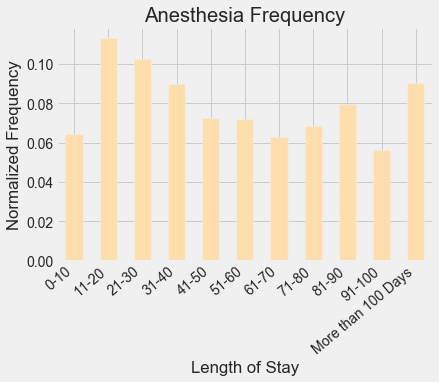

In [385]:
an_stay = train.groupby("Stay")["Department"].value_counts(normalize=True).unstack()["anesthesia"].plot(kind = "bar", 
                                                                                                        color = "navajowhite")
an_stay.set_xticklabels(an_stay.get_xticklabels(), rotation=40, ha="right")
an_stay.set_title("Anesthesia Frequency")
an_stay.set_xlabel("Length of Stay")
an_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

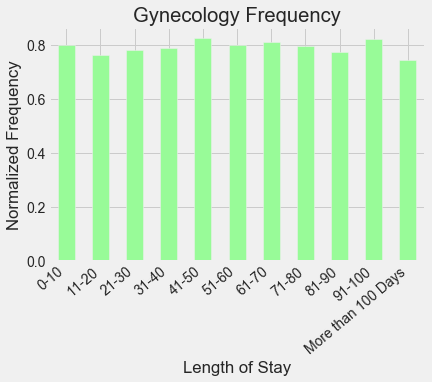

In [386]:
gy_stay = train.groupby("Stay")["Department"].value_counts(normalize=True).unstack()["gynecology"].plot(kind = "bar", 
                                                                                                        color = "palegreen")
gy_stay.set_xticklabels(gy_stay.get_xticklabels(), rotation=40, ha="right")
gy_stay.set_title("Gynecology Frequency")
gy_stay.set_xlabel("Length of Stay")
gy_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

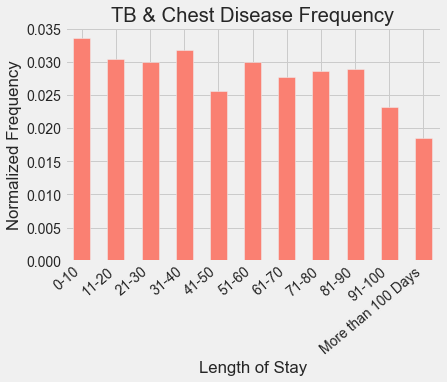

In [387]:
tb_stay = train.groupby("Stay")["Department"].value_counts(normalize=True).unstack()["TB & Chest disease"].plot(kind = "bar", 
                                                                                                                color = "salmon")
tb_stay.set_xticklabels(tb_stay.get_xticklabels(), rotation=40, ha="right")
tb_stay.set_title("TB & Chest Disease Frequency")
tb_stay.set_xlabel("Length of Stay")
tb_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

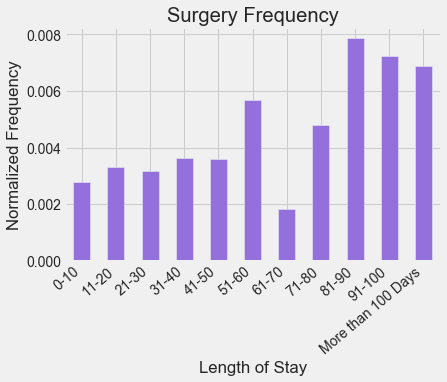

In [390]:
su_stay = train.groupby("Stay")["Department"].value_counts(normalize=True).unstack()["surgery"].plot(kind = "bar",
                                                                                                     color = "mediumpurple")
su_stay.set_xticklabels(su_stay.get_xticklabels(), rotation=40, ha="right")
su_stay.set_title("Surgery Frequency")
su_stay.set_xlabel("Length of Stay")
su_stay.set_ylabel("Normalized Frequency")

gynecology heavily outweigh other variables by freuqnecy

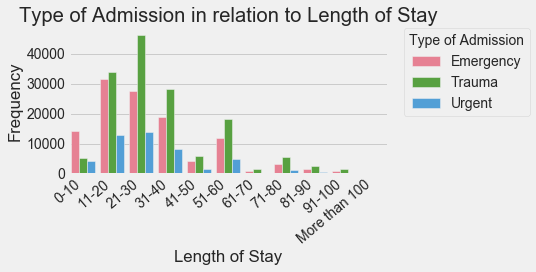

In [375]:
ax3 = sns.countplot(x = train["Stay"], 
                    hue = train["Type of Admission"], 
                    order = ["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100","More than 100"],
                   palette = "husl")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.set_title("Type of Admission in relation to Length of Stay")
ax3.set_xlabel("Length of Stay")
ax3.set_ylabel("Frequency")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Type of Admission")
plt.show()

distribution is relatively equal between different lengths of stay, however, trauma patients tend to be higher than emergency patients for 11-20 days onwards, while emerency patients has higher frequency in 0-10 days of stay. 

Text(0, 0.5, 'Normalized Frequency')

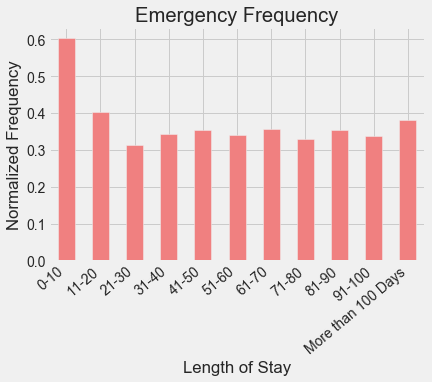

In [381]:
em_stay = train.groupby("Stay")["Type of Admission"].value_counts(normalize=True).unstack()["Emergency"].plot(kind = "bar", 
                                                                                                              color = "lightcoral")
em_stay.set_xticklabels(em_stay.get_xticklabels(), rotation=40, ha="right")
em_stay.set_title("Emergency Frequency")
em_stay.set_xlabel("Length of Stay")
em_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

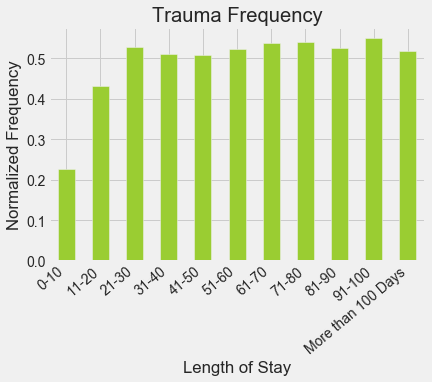

In [382]:
tr_stay = train.groupby("Stay")["Type of Admission"].value_counts(normalize=True).unstack()["Trauma"].plot(kind = "bar", 
                                                                                                           color = "yellowgreen")
tr_stay.set_xticklabels(tr_stay.get_xticklabels(), rotation=40, ha="right")
tr_stay.set_title("Trauma Frequency")
tr_stay.set_xlabel("Length of Stay")
tr_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

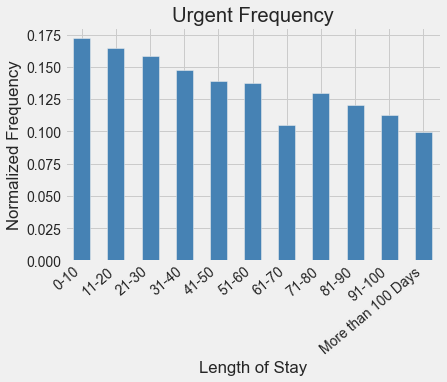

In [383]:
ur_stay = train.groupby("Stay")["Type of Admission"].value_counts(normalize=True).unstack()["Urgent"].plot(kind = "bar"
                                                                                                           , color = "steelblue")
ur_stay.set_xticklabels(ur_stay.get_xticklabels(), rotation=40, ha="right")
ur_stay.set_title("Urgent Frequency")
ur_stay.set_xlabel("Length of Stay")
ur_stay.set_ylabel("Normalized Frequency")

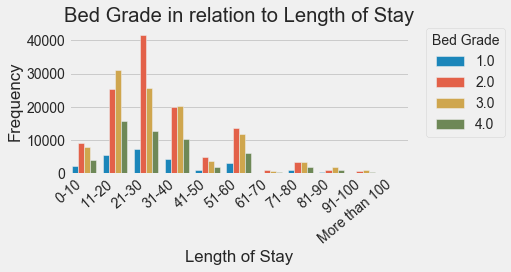

In [209]:
ax4 = sns.countplot(x = train["Stay"], 
                    hue = train["Bed Grade"], 
                    order = ["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100","More than 100"])
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
ax4.set_title("Bed Grade in relation to Length of Stay")
ax4.set_xlabel("Length of Stay")
ax4.set_ylabel("Frequency")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Bed Grade")
plt.show()

Text(0, 0.5, 'Normalized Frequency')

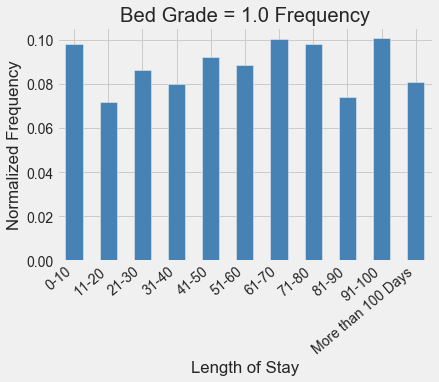

In [364]:
b1_stay = train.groupby("Stay")["Bed Grade"].value_counts(normalize=True).unstack()[1.0].plot(kind = "bar"
                                                                                                , color = "steelblue")
b1_stay.set_xticklabels(b1_stay.get_xticklabels(), rotation=40, ha="right")
b1_stay.set_title("Bed Grade = 1.0 Frequency")
b1_stay.set_xlabel("Length of Stay")
b1_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

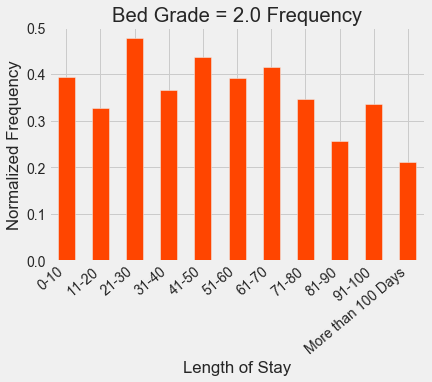

In [394]:
b2_stay = train.groupby("Stay")["Bed Grade"].value_counts(normalize=True).unstack()[2.0].plot(kind = "bar"
                                                                                                , color = "orangered")
b2_stay.set_xticklabels(b2_stay.get_xticklabels(), rotation=40, ha="right")
b2_stay.set_title("Bed Grade = 2.0 Frequency")
b2_stay.set_xlabel("Length of Stay")
b2_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

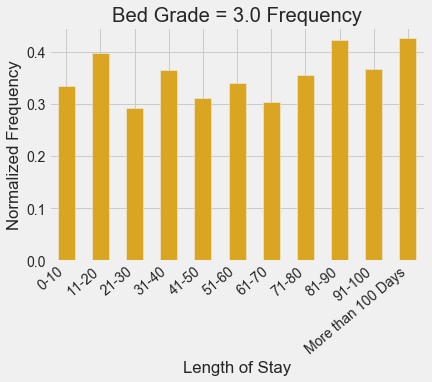

In [395]:
b3_stay = train.groupby("Stay")["Bed Grade"].value_counts(normalize=True).unstack()[3.0].plot(kind = "bar"
                                                                                                , color = "goldenrod")
b3_stay.set_xticklabels(b3_stay.get_xticklabels(), rotation=40, ha="right")
b3_stay.set_title("Bed Grade = 3.0 Frequency")
b3_stay.set_xlabel("Length of Stay")
b3_stay.set_ylabel("Normalized Frequency")

Text(0, 0.5, 'Normalized Frequency')

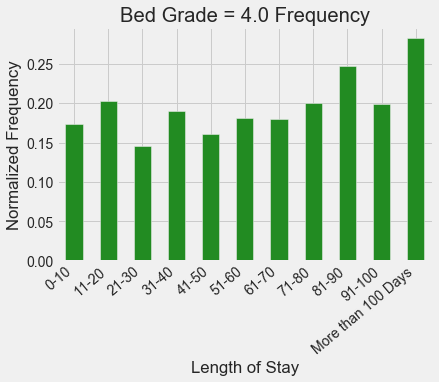

In [396]:
b4_stay = train.groupby("Stay")["Bed Grade"].value_counts(normalize=True).unstack()[4.0].plot(kind = "bar"
                                                                                                , color = "forestgreen")
b4_stay.set_xticklabels(b4_stay.get_xticklabels(), rotation=40, ha="right")
b4_stay.set_title("Bed Grade = 4.0 Frequency")
b4_stay.set_xlabel("Length of Stay")
b4_stay.set_ylabel("Normalized Frequency")

Can see that there is a difference between 2.0 grade bed and 3.0 grade for length of stay. 21-30 days of stay tend to use 2.0 grade bed, while 11-20 days of stay tend to use 3.0. 1.0 grade bed is barely used, even lower than 4.0 on average.

In [210]:
for features in train.columns:
    print('Unique Values for {}'.format(features))
    print(train[features].unique())
    print('======================================')
    print()

Unique Values for case_id
[     1      2      3 ... 318436 318437 318438]

Unique Values for Hospital_code
[ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]

Unique Values for Hospital_type_code
['c' 'e' 'b' 'a' 'f' 'd' 'g']

Unique Values for City_Code_Hospital
[ 3  5  1  2  6  9 10  4 11  7 13]

Unique Values for Hospital_region_code
['Z' 'X' 'Y']

Unique Values for Available Extra Rooms in Hospital
[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]

Unique Values for Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']

Unique Values for Ward_Type
['R' 'S' 'Q' 'P' 'T' 'U']

Unique Values for Ward_Facility_Code
['F' 'E' 'D' 'B' 'A' 'C']

Unique Values for Bed Grade
[ 2.  3.  4.  1. nan]

Unique Values for patientid
[ 31397  63418   8088 ... 125235  91081  21641]

Unique Values for City_Code_Patient
[ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. nan 25. 15. 12. 10. 28. 24. 23.
 20. 11. 13. 21. 18. 16. 26. 

In [211]:
# Check for null values
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [398]:
train["Bed Grade"] = train["Bed Grade"].fillna(2.0)
test["Bed Grade"] = test["Bed Grade"].fillna(2.0)

## 2. Data Processing & Feature engineering

In [399]:
train = train.drop(['Hospital_region_code', 'patientid', 'City_Code_Patient'], axis = 1)
test = test.drop(['Hospital_region_code', 'patientid', 'City_Code_Patient'], axis = 1)

In [400]:
# Combine test and train dataset for processing
combined = [train, test]

**2a Encoding categorical features**

In [401]:
from sklearn.preprocessing import LabelEncoder

for dataset in combined:
    label = LabelEncoder()
    dataset['Department'] = label.fit_transform(dataset['Department'])

In [402]:
combined[1].Department.unique()

array([2, 1, 0, 3, 4], dtype=int64)

In [403]:
# Ward type
for dataset in combined:
    label = LabelEncoder()
    dataset['Hospital_type_code'] = label.fit_transform(dataset['Hospital_type_code'])
    dataset['Ward_Facility_Code'] = label.fit_transform(dataset['Ward_Facility_Code'])
    dataset['Ward_Type'] = label.fit_transform(dataset['Ward_Type'])
    dataset['Type of Admission'] = label.fit_transform(dataset['Type of Admission'])
    dataset['Severity of Illness'] = label.fit_transform(dataset['Severity of Illness'])

In [404]:
combined[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,3,3,2,5,2.0,0,0,2,51-60,4911.0,0-10
1,2,2,2,5,2,3,3,5,2.0,1,0,2,51-60,5954.0,41-50
2,3,10,4,1,2,1,3,4,2.0,1,0,2,51-60,4745.0,31-40
3,4,26,1,2,2,3,2,3,2.0,1,0,2,51-60,7272.0,41-50
4,5,26,1,2,2,3,3,3,2.0,1,0,2,51-60,5558.0,41-50
5,6,23,0,6,2,1,3,5,2.0,1,0,2,51-60,4449.0,11-20
6,7,32,5,9,1,3,3,1,3.0,0,0,2,51-60,6167.0,0-10
7,8,23,0,6,4,3,1,5,3.0,1,0,2,51-60,5571.0,41-50
8,9,1,3,10,2,2,2,1,4.0,1,0,2,51-60,7223.0,51-60
9,10,10,4,1,2,2,3,4,3.0,1,0,2,51-60,6056.0,31-40


**2b Binning features**

In [405]:
combined[1]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,2,3,3,2,3,0,2.0,0,2,2,71-80,3095.0
1,318440,29,0,4,2,2,3,5,2.0,1,2,4,71-80,4018.0
2,318441,26,1,2,3,2,1,3,4.0,0,2,3,71-80,4492.0
3,318442,6,0,6,3,2,1,5,2.0,1,2,3,71-80,4173.0
4,318443,28,1,11,2,2,2,5,2.0,1,2,4,71-80,4161.0
5,318444,23,0,6,3,2,1,5,2.0,1,2,2,71-80,4659.0
6,318445,26,1,2,2,2,1,3,2.0,1,2,2,71-80,4167.0
7,318446,25,4,1,4,2,3,4,3.0,0,2,2,31-40,4396.0
8,318447,23,0,6,4,2,1,5,3.0,1,2,2,31-40,4088.0
9,318448,23,0,6,3,2,1,5,4.0,2,2,2,31-40,3925.0


In [406]:
combined[0].Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [407]:
age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

In [408]:
for dataset in combined:
    dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())

In [409]:
combined[0].Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [410]:
stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}

In [411]:
combined[0]['Stay'] = combined[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())

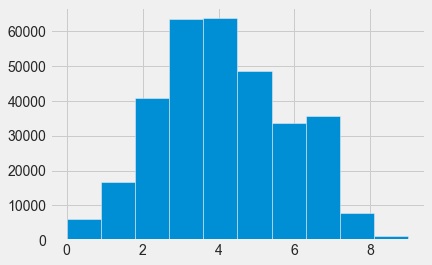

In [412]:
combined[0].Age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D099177860>,
      dtype=object)

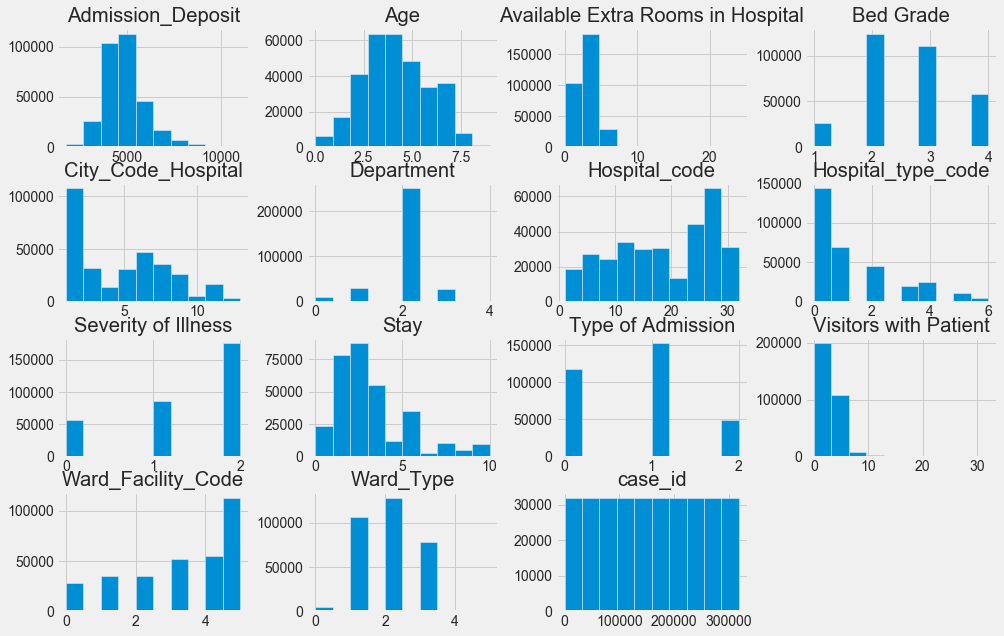

In [430]:
combined[0].hist(figsize=(15, 10))

[Text(0, 0, '0-10'),
 Text(0, 0, '11-20'),
 Text(0, 0, '21-30'),
 Text(0, 0, '31-40'),
 Text(0, 0, '41-50'),
 Text(0, 0, '51-60'),
 Text(0, 0, '61-70'),
 Text(0, 0, '71-80'),
 Text(0, 0, '81-90')]

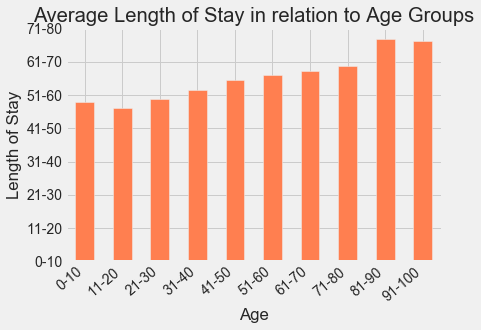

In [419]:
age_labels = ['0-10', '11-20', '21-30', '31-40','41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
stay_labels = ['0-10', '11-20', '21-30', '31-40','41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']
age_mean = train.groupby("Age")["Stay"].agg(["mean"]).plot(kind = "bar", color = "coral", legend = None)
age_mean.set_title("Average Length of Stay in relation to Age Groups")
age_mean.set_xlabel("Age")
age_mean.set_ylabel("Length of Stay")
age_mean.set_xticklabels(age_labels, rotation=40, ha="right")
age_mean.set_yticklabels(stay_labels)

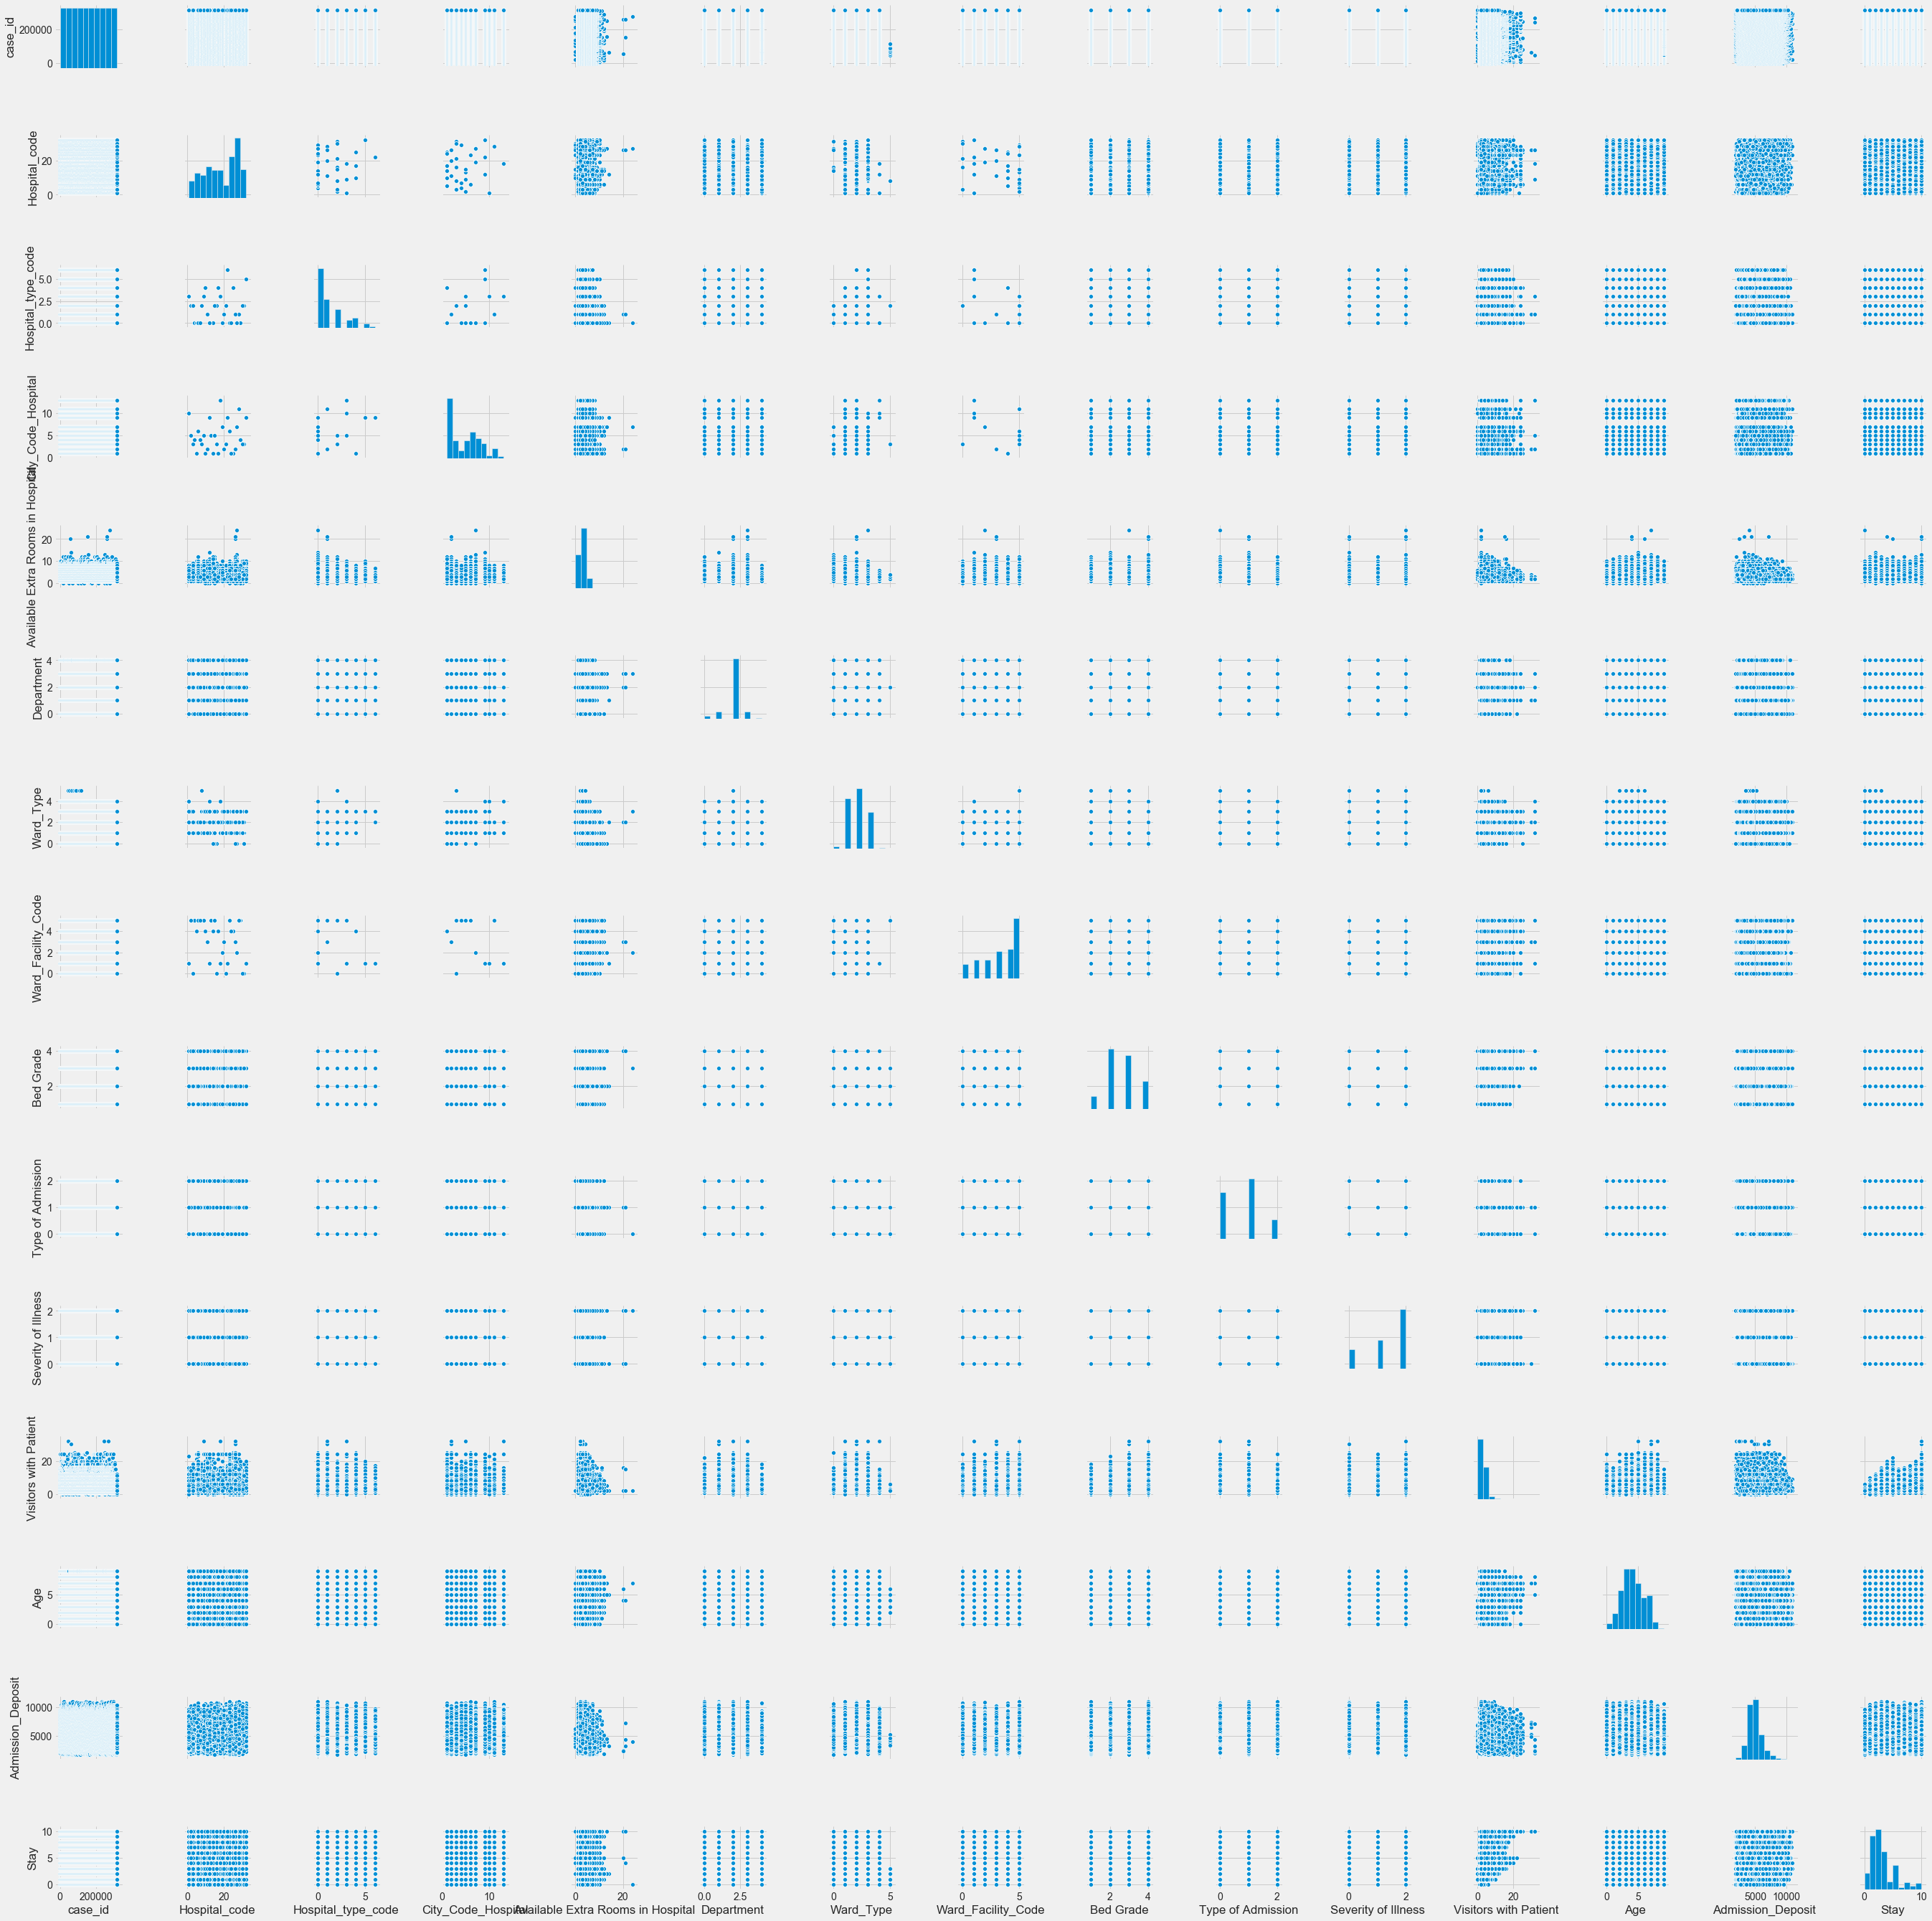

In [424]:
sns.pairplot(combined[0])

In [425]:
combined[0].corr()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,1.000000,-0.043023,0.001877,-0.011352,0.042580,-0.002175,-0.029183,-0.011546,0.013714,0.076789,0.013935,0.001309,-0.114694,-0.045972,-0.053882
Hospital_code,-0.043023,1.000000,0.039449,0.128294,-0.059638,0.000777,0.161108,-0.132347,-0.013374,-0.014268,-0.007585,-0.028500,0.016322,0.045446,0.042846
Hospital_type_code,0.001877,0.039449,1.000000,-0.000839,-0.103044,0.001768,0.246347,-0.265768,0.018973,0.080073,-0.004625,-0.045213,0.006030,0.025341,0.058592
City_Code_Hospital,-0.011352,0.128294,-0.000839,1.000000,-0.045771,0.029308,0.122285,-0.100474,-0.049400,-0.015547,-0.000018,0.018184,0.020507,-0.034455,0.006381
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.103044,-0.045771,1.000000,0.047726,-0.433849,0.050453,-0.115913,-0.016498,0.015053,0.096714,-0.133491,-0.143739,-0.121120
Department,-0.002175,0.000777,0.001768,0.029308,0.047726,1.000000,-0.005972,-0.040371,-0.096805,-0.080768,-0.008075,0.026054,0.035518,-0.080754,0.033287
Ward_Type,-0.029183,0.161108,0.246347,0.122285,-0.433849,-0.005972,1.000000,-0.155031,-0.013366,0.012701,0.001503,-0.096451,0.024332,0.050825,0.185191
Ward_Facility_Code,-0.011546,-0.132347,-0.265768,-0.100474,0.050453,-0.040371,-0.155031,1.000000,0.075573,0.043242,0.014844,0.022088,-0.000417,-0.023057,-0.004552
Bed Grade,0.013714,-0.013374,0.018973,-0.049400,-0.115913,-0.096805,-0.013366,0.075573,1.000000,0.126211,0.050104,0.088950,0.001756,0.073889,0.025692
Type of Admission,0.076789,-0.014268,0.080073,-0.015547,-0.016498,-0.080768,0.012701,0.043242,0.126211,1.000000,0.011542,-0.097966,-0.063396,0.043352,0.023617


In [431]:
for dataset in combined:
    print(dataset.shape)

(318438, 15)
(137057, 14)


In [432]:
combined[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 14 columns):
case_id                              137057 non-null int64
Hospital_code                        137057 non-null int64
Hospital_type_code                   137057 non-null int32
City_Code_Hospital                   137057 non-null int64
Available Extra Rooms in Hospital    137057 non-null int64
Department                           137057 non-null int32
Ward_Type                            137057 non-null int32
Ward_Facility_Code                   137057 non-null int32
Bed Grade                            137057 non-null float64
Type of Admission                    137057 non-null int32
Severity of Illness                  137057 non-null int32
Visitors with Patient                137057 non-null int64
Age                                  137057 non-null int64
Admission_Deposit                    137057 non-null float64
dtypes: float64(2), int32(6), int64(6)
memory usage: 11.5 M

**2c Scaling numerical data**

In [433]:
columns_list = ['Type of Admission', 'Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']

In [434]:
len(columns_list)

4

In [435]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

for dataset in combined:
    dataset[columns_list]= ss.fit_transform(dataset[columns_list].values)

In [436]:
combined[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,-0.169177,3,2,5,2.0,-1.136165,0,-0.727923,5,0.027835,0
1,2,2,2,5,-1.025217,3,3,5,2.0,0.315306,0,-0.727923,5,0.987556,4
2,3,10,4,1,-1.025217,1,3,4,2.0,0.315306,0,-0.727923,5,-0.124910,3
3,4,26,1,2,-1.025217,3,2,3,2.0,0.315306,0,-0.727923,5,2.200319,4
4,5,26,1,2,-1.025217,3,3,3,2.0,0.315306,0,-0.727923,5,0.623175,4
5,6,23,0,6,-1.025217,1,3,5,2.0,0.315306,0,-0.727923,5,-0.397276,1
6,7,32,5,9,-1.881257,3,3,1,3.0,-1.136165,0,-0.727923,5,1.183549,0
7,8,23,0,6,0.686863,3,1,5,3.0,0.315306,0,-0.727923,5,0.635137,4
8,9,1,3,10,-1.025217,2,2,1,4.0,0.315306,0,-0.727923,5,2.155231,5
9,10,10,4,1,-1.025217,2,3,4,3.0,0.315306,0,-0.727923,5,1.081412,3


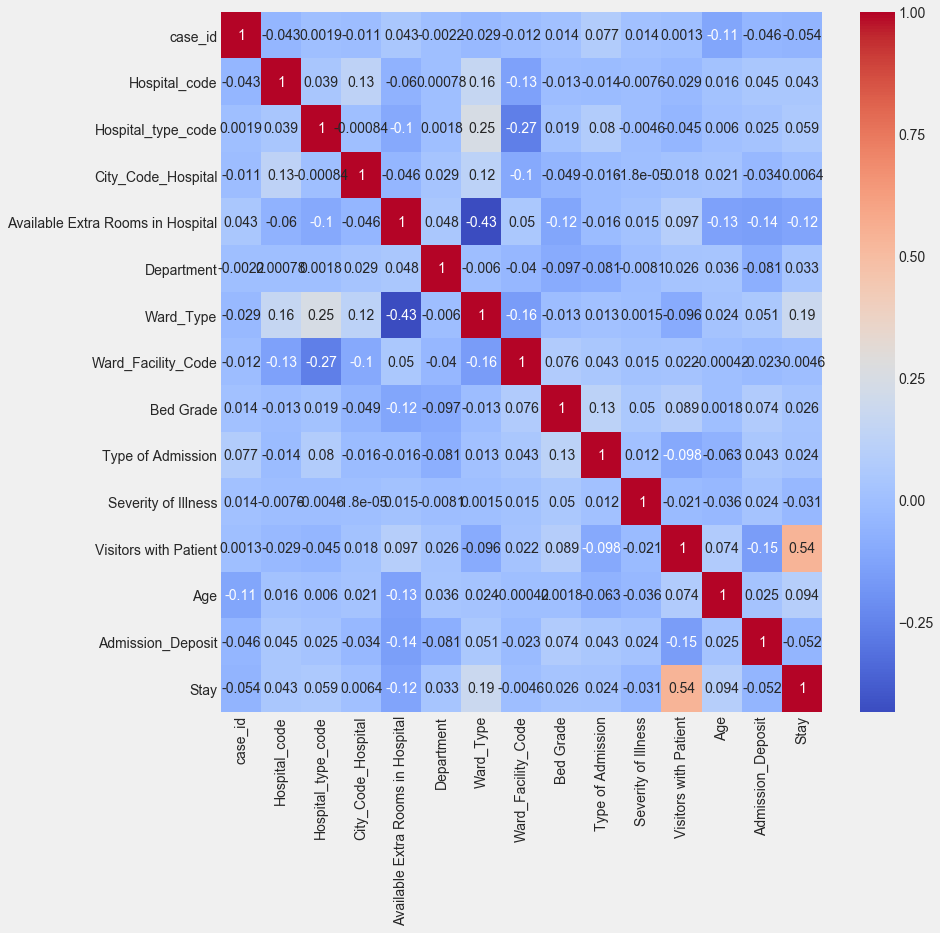

In [437]:
plt.figure(figsize=(12,12))
sns.heatmap(combined[0].corr(), annot=True, cmap='coolwarm')

## Data Modelling

In [530]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [439]:
train = combined[0]
test = combined[1]

In [440]:
sample

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
5,318444,0-10
6,318445,0-10
7,318446,0-10
8,318447,0-10
9,318448,0-10


In [441]:
X_train = train.drop(['case_id', 'Stay'], axis=1)
Y_train = train["Stay"]
X_test  = test.drop("case_id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((318438, 13), (318438,), (137057, 13))

In [442]:
sample.shape

(137057, 2)

In [443]:
X_test.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Bed Grade', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [444]:
X_test.isna().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [445]:
Y_train

0         0
1         4
2         3
3         4
4         4
5         1
6         0
7         4
8         5
9         3
10        2
11        1
12        0
13        2
14        0
15        0
16        0
17        1
18        2
19        3
20        3
21        2
22        1
23        2
24        3
25        1
26        1
27        2
28        3
29        2
         ..
318408    5
318409    2
318410    1
318411    0
318412    0
318413    1
318414    1
318415    1
318416    1
318417    2
318418    0
318419    3
318420    1
318421    0
318422    0
318423    1
318424    1
318425    1
318426    0
318427    3
318428    1
318429    0
318430    2
318431    1
318432    2
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [462]:
# Logistic Regression

#define model
log_reg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1200000)

# fit the model
log_reg.fit(X_train, Y_train)

#predicted values for test set
Y_pred = log_reg.predict(X_test)

#accuracy for logistic regression
acc_log_reg = round(log_reg.score(X_train, Y_train) * 100, 2)
acc_log_reg

37.8

Top 5 Important Features for Logistic Regression

             Attribute             	             Importance            
        --------------------       	        --------------------       
       Visitors with Patient       	                1.91               
             Ward_Type             	                0.63               
         Type of Admission         	                0.48               
         Admission_Deposit         	                0.40               
 Available Extra Rooms in Hospital 	                0.22               


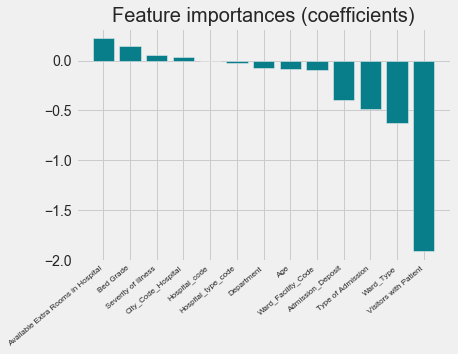

In [525]:
# get importance
feature_importance = log_reg.coef_[0]

#summarize important features
print("Top 5 Important Features for Logistic Regression\n")
print("Attribute".center(35),"Importance".center(35), sep = "\t")
print("--------------------".center(35),"--------------------".center(35), sep = "\t")
for importance, name in sorted(zip(abs(log_reg.coef_[0]), X_train.columns),reverse=True)[:5]:
    print (name.center(35), format(importance,'.2f').center(35), sep = "\t")
# plot feature importance
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': log_reg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False) 
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances (coefficients)', size=20)
plt.xticks(rotation=40, ha = "right", fontsize = 8)
plt.show()

In [484]:
feature_importance

array([-0.00960136, -0.02570239,  0.03699419,  0.22117841, -0.07299098,
       -0.6288387 , -0.09753907,  0.14168781, -0.4813365 ,  0.05512942,
       -1.90583771, -0.08469881, -0.39687997])

In [446]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

58.54

In [447]:
# Decision Tree

#define model
decision_tree = DecisionTreeClassifier()

#fit model
decision_tree.fit(X_train, Y_train)

#predicted values for test set
Y_pred = decision_tree.predict(X_test)

#get accuracy
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.87

Top 5 Important Features for Decision Tree

             Attribute             	             Importance            
        --------------------       	        --------------------       
         Admission_Deposit         	                0.40               
                Age                	                0.13               
 Available Extra Rooms in Hospital 	                0.08               
       Visitors with Patient       	                0.08               
             Ward_Type             	                0.05               


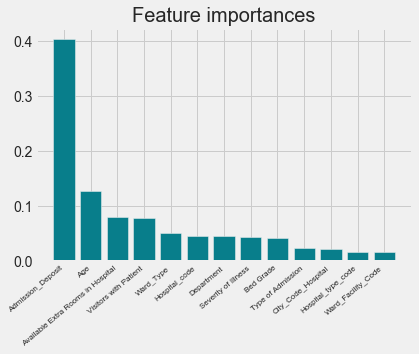

In [520]:
# get importance
feature_importance = decision_tree.feature_importances_

# summarize feature importance
print("Top 5 Important Features for Decision Tree\n")
print("Attribute".center(35),"Importance".center(35), sep = "\t")
print("--------------------".center(35),"--------------------".center(35), sep = "\t")
for importance, name in sorted(zip(decision_tree.feature_importances_, X_train.columns),reverse=True)[:5]:
    print (name.center(35), format(importance,'.2f').center(35), sep = "\t")
    
# plot feature importance
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': decision_tree.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False) 
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation=40, ha = "right", fontsize = 8)
plt.show()

In [448]:
# Random Forest

#define model
random_forest = RandomForestClassifier(n_estimators=100)

#fit model
random_forest.fit(X_train, Y_train)

#predicted values for test set
Y_pred = random_forest.predict(X_test)

#get accuracy
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.87

Top 5 Important Features for Random Forest

             Attribute             	             Importance            
        --------------------       	        --------------------       
         Admission_Deposit         	                0.40               
                Age                	                0.14               
       Visitors with Patient       	                0.10               
 Available Extra Rooms in Hospital 	                0.08               
             Bed Grade             	                0.05               


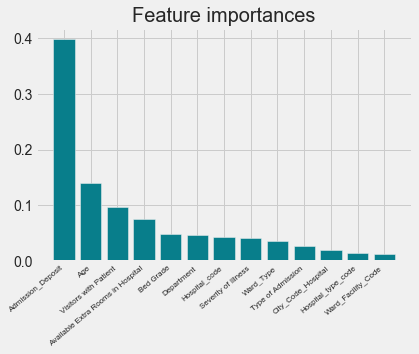

In [518]:
# get importance
feature_importance = random_forest.feature_importances_

# summarize feature importance
print("Top 5 Important Features for Random Forest\n")
print("Attribute".center(35),"Importance".center(35), sep = "\t")
print("--------------------".center(35),"--------------------".center(35), sep = "\t")
for importance, name in sorted(zip(random_forest.feature_importances_, X_train.columns),reverse=True)[:5]:
    print (name.center(35), format(importance,'.2f').center(35), sep = "\t")
    
# plot feature importance
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': random_forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False) 
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation=40, ha = "right", fontsize = 8)
plt.show()

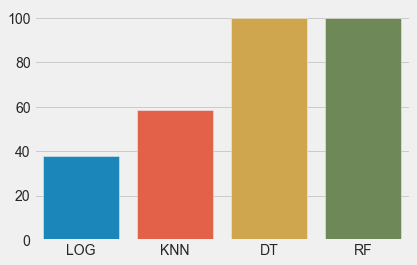

In [507]:
sns.barplot(x= ['LOG','KNN','DT','RF'],y= [acc_log_reg, acc_knn, acc_decision_tree,acc_random_forest])